## Завдання ЛР 4

У цій роботі ви спробуєте навчити класифікатор класифікувати позичальників банку на добросовісних (ті, що вчасно повернуть кредит) та недобросовісних (ті, що не повернуть кредит або повернуть невчасно) на основі набору характеристик позичальників банку.

In [1]:
#імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('credit_default.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
df.describe ()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Опис датафрейму  
Цей набір даних містить інформацію про 32581 позичальників банку:  
**person_age** - вік позичальника  
**person_income** - річний дохід позичальника     
**person_home_ownership** - житло: орендує, виплачує іпотеку, власне житло     
**person_emp_length** - стаж роботи      
**loan_intent** - призначення кредиту: навчання, лікування і т.д.  
**loan_grade** - кредитний рейтинг       
**loan_amnt** - розмір кредиту     
**loanintrate** - відсоткова ставка по кредиту  
**loan_status - статус кредиту (0 сплачено, 1 - не сплачено) ЦІЛЬОВА ЗМІННА**     
**loan_percent_income** - розмір кредитного платежу у % до доходу   
**cb_person_default_on_file** - кредитна історія   
**cb_preson_cred_hist_length** - тривалість кредитної історії

### Завдання
1. Подивіться на датасет: .head (), .info (), .dtypes, .describe ()  
2. Для кращого розуміння даних порівняйте характеристики добросовісних та недобросовісних позичальників, **зробіть відповідні висновки**  
3. Виконайте попередню обробку даних  
4. Реалізуйте алгоритми логістичної регресії, найближчих сусідів (KNN) та опорних векторів (SVM) для класифікації позичальників банку (<span style="color:red"> перший алгоритм розглядала на лекції, другий, третій - на самостійне опрацювання</span>). Перевірте точність класифікаторів та обретіть найкращий із них для подальшої роботи. **Зробіть висновки: чи вдалося побудувати точний класифікатор; який із трьох розглянутих алгоритмів показав найкращі, а який найгірші результати?**  
5. Необхідно прийняти рішення щодо видачі кредиту  для нових позичальників, інформація про яких знаходиться в файлі 'give_refuse_a_loan.csv': спрогнозуйте значення цільової змінної та **зробіть висновки яким позичальникам варто видати кредит, а яким - відмовити.**

In [4]:
#df: 32,581 записи клієнтів в 12 стовпців.

In [5]:
#Кількісні:person_age ,person_income,loan_amnt,loan_status,cb_person_cred_hist_length,person_emp_length,loan_int_rate,loan_percent_income.
#Категораільні:person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
#person_emp_length — 895 пропущених значень.
#loan_int_rate — 3116 пропущених значень.

In [6]:
#2 Для кращого розуміння даних порівняйте характеристики добросовісних та недобросовісних позичальників, зробіть відповідні висновки

In [7]:
# Поділ на групи за статусом кредиту сплачено або ні
good_borrowers = df[df['loan_status'] == 0]
bad_borrowers = df[df['loan_status'] == 1]

avg_0 = good_borrowers.mean(numeric_only=True)
avg_1 = bad_borrowers.mean(numeric_only=True)
# Порівняння результатів
comparison = pd.DataFrame({'Добросовісні': avg_0, 'Не добросовісні': avg_1})

# Вивід результатів
print(comparison)

                            Добросовісні  Не добросовісні
person_age                     27.807129        27.474676
person_income               70804.361559     49125.652223
person_emp_length               4.968745         4.137562
loan_amnt                    9237.464178     10850.502954
loan_int_rate                  10.435999        13.060207
loan_status                     0.000000         1.000000
loan_percent_income             0.148805         0.246889
cb_person_cred_hist_length      5.837475         5.685003


In [8]:
#person_home_ownership: Оренда житла є часто ознакою недоброякісних кредиторів.
#loan_intent: Кредити на  бізнес-проекти ризиковані.Часто беруть недоброякісні кредитори.
#loan_grade: C, D більш ризиковані.
#cb_person_default_on_file: Позичальники з попередніми боргами частіше не виплачують кредити.
#(person_income): У добросовісних позичальників  вищий дохід.
#(person_emp_length): У добросовісних позичальників більший стаж роботи.
#(loan_amnt): Недобросовісні позичальники, частіше беруть більші кредити.
#(loan_percent_income): Недобросовісні позичальники витрачають значно більший відсотків свого доходу на погашення кредиту.

In [9]:
#3 Виконайте попередню обробку даних

In [10]:
#Видалимо інші рядки ,де є пропуски.
df.dropna(inplace=True)


In [11]:
# Список стовпців, для яких потрібно видалити викиди
columns_to_clean = [
    'person_age', 
    'person_income', 
    'person_emp_length', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length'
]

# Початковий DataFrame
df = df.copy()  # Зробіть копію, якщо потрібно зберегти початкові дані

# Очищення даних для кожного стовпця
for column in columns_to_clean:
    # Обчислюємо квантилі 1% та 99%
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    
    # Фільтруємо дані з урахуванням пропусків (NaN)
    df_cleaned = df[((df[column] >= lower_bound) & (df[column] <= upper_bound)) | (df[column].isna())]
    
    # Перевіряємо розмір нового DataFrame після видалення викидів
    print(f'Кількість рядків після видалення викидів для стовпця {column}: {df_cleaned.shape[0]}')
    
    # Повертаємося до оновленого DataFrame
    df = df_cleaned.copy()  # Зберігаємо очищений DataFrame

# Огляд фінального очищеного DataFrame
df.info()

Кількість рядків після видалення викидів для стовпця person_age: 28371
Кількість рядків після видалення викидів для стовпця person_income: 27871
Кількість рядків після видалення викидів для стовпця person_emp_length: 27610
Кількість рядків після видалення викидів для стовпця loan_amnt: 27108
Кількість рядків після видалення викидів для стовпця loan_int_rate: 26847
Кількість рядків після видалення викидів для стовпця loan_percent_income: 26318
Кількість рядків після видалення викидів для стовпця cb_person_cred_hist_length: 26318
<class 'pandas.core.frame.DataFrame'>
Index: 26318 entries, 63 to 32295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26318 non-null  int64  
 1   person_income               26318 non-null  int64  
 2   person_home_ownership       26318 non-null  object 
 3   person_emp_length           26318 non-null  float64
 4   loan_intent   

In [12]:
#Визначимо матрицю незалежних змінних (факторів) та вектор залежної (цільової) змінної
X = df.drop(df[['loan_status']], axis=1)
print(X.head())
y = df['loan_status']
print(y.head())

    person_age  person_income person_home_ownership  person_emp_length  \
63          25         221850              MORTGAGE                9.0   
73          23          65000                  RENT                2.0   
74          26          85000                  RENT                2.0   
76          22          88000                  RENT                6.0   
79          24          83004                  RENT                0.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
63     MEDICAL          D      25000          15.70                 0.10   
73   EDUCATION          A      28000           7.90                 0.43   
74     VENTURE          A      28000           7.49                 0.33   
76     VENTURE          B      28000           9.91                 0.32   
79     VENTURE          D      28000          15.99                 0.34   

   cb_person_default_on_file  cb_person_cred_hist_length  
63                         N           

In [13]:
# Вибираємо категоріальні стовпці в матриці незалежних змінних
categorical_columns = X.select_dtypes(include=['object']).columns

# Вибираємо кількісні ознаки (числові стовпці) в матриці незалежних змінних
numeric_columns = X.select_dtypes(include=[float, int]).columns

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Імпортуємо клас OneHotEncoder з бібліотеки sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(X[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_X = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns), index=X.index)

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
X = X.drop(columns=categorical_columns)  # Видаляємо оригінальні категоріальні стовпці
X = pd.concat([X, encoded_X], axis=1)

# Перевіряємо результати
print(X.head())

    person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
63          25         221850                9.0      25000          15.70   
73          23          65000                2.0      28000           7.90   
74          26          85000                2.0      28000           7.49   
76          22          88000                6.0      28000           9.91   
79          24          83004                0.0      28000          15.99   

    loan_percent_income  cb_person_cred_hist_length  \
63                 0.10                           2   
73                 0.43                           2   
74                 0.33                           3   
76                 0.32                           3   
79                 0.34                           4   

    person_home_ownership_OTHER  person_home_ownership_OWN  \
63                          0.0                        0.0   
73                          0.0                        0.0   
74            

In [15]:
#Стандартизуємо матрицю Х
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [16]:
#4 Реалізуйте алгоритми логістичної регресії, найближчих сусідів (KNN) та опорних векторів (SVM) для класифікації позичальників банку перший алгоритм розглядала на лекції, другий, третій - на самостійне опрацювання).
#Перевірте точність класифікаторів та обретіть найкращий із них для подальшої роботи.
#Зробіть висновки: чи вдалося побудувати точний класифікатор; який із трьох розглянутих алгоритмів показав найкращі, а який найгірші результати?

In [17]:

# імпортуємо train_test_split із модуля sklearn.model_selection
from sklearn.model_selection import train_test_split

#Розділимо дані на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_std, y, stratify = y, test_size=0.2, random_state=0)

In [18]:
# Імпортуємо необхідні бібліотеки
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [19]:
# 1. Логістична регресія
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train_log_reg = log_reg.predict(X_train)
y_pred_test_log_reg = log_reg.predict(X_test)
accuracy_train_log_reg = accuracy_score(y_train, y_pred_train_log_reg)
accuracy_test_log_reg = accuracy_score(y_test, y_pred_test_log_reg)
print(f"Точність класифікації логістичної регресії на навчальній вибірці: {accuracy_train_log_reg:.3f}")
print(f"Точність класифікації логістичної регресії на тестовій вибірці: {accuracy_test_log_reg:.3f}")

Точність класифікації логістичної регресії на навчальній вибірці: 0.869
Точність класифікації логістичної регресії на тестовій вибірці: 0.876


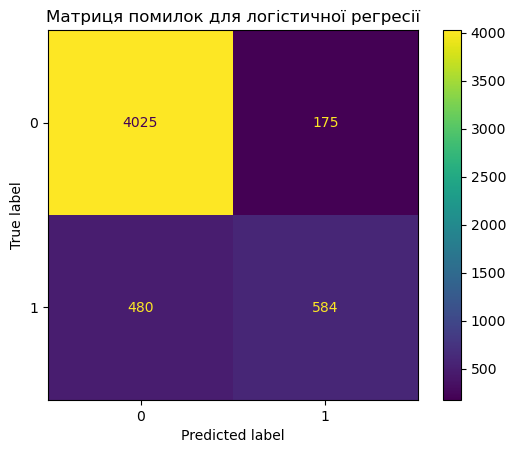

In [20]:
# Матриця помилок для тестової вибірки логістичної регресії
cm_log_reg = confusion_matrix(y_test, y_pred_test_log_reg)
cmd_log_reg = ConfusionMatrixDisplay(cm_log_reg, display_labels=['0', '1'])
cmd_log_reg.plot()
plt.title("Матриця помилок для логістичної регресії")
plt.show()

In [21]:
# 2. Метод K найближчих сусідів (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Прогнози та точність для навчальної і тестової вибірок
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)

print(f"Точність класифікації KNN на навчальній вибірці: {accuracy_train_knn:.3f}")
print(f"Точність класифікації KNN на тестовій вибірці: {accuracy_test_knn:.3f}")

Точність класифікації KNN на навчальній вибірці: 0.919
Точність класифікації KNN на тестовій вибірці: 0.901


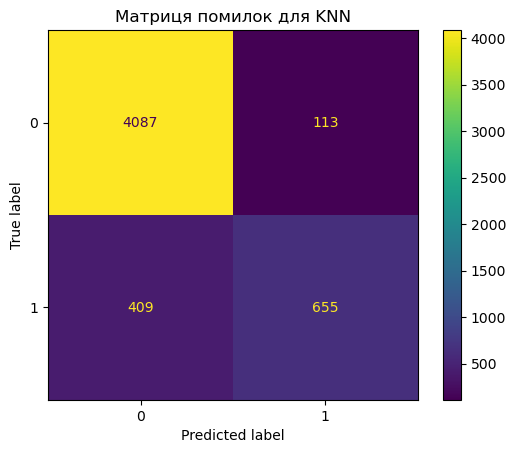

In [22]:
# Матриця помилок для тестової вибірки KNN
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
cmd_knn = ConfusionMatrixDisplay(cm_knn, display_labels=['0', '1'])
cmd_knn.plot()
plt.title("Матриця помилок для KNN")
plt.show()

In [23]:
# 3. Метод опорних векторів (SVM)
svm = SVC()
svm.fit(X_train, y_train)

# Прогнози та точність для навчальної і тестової вибірок
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print(f"Точність класифікації SVM на навчальній вибірці: {accuracy_train_svm:.3f}")
print(f"Точність класифікації SVM на тестовій вибірці: {accuracy_test_svm:.3f}")

Точність класифікації SVM на навчальній вибірці: 0.917
Точність класифікації SVM на тестовій вибірці: 0.918


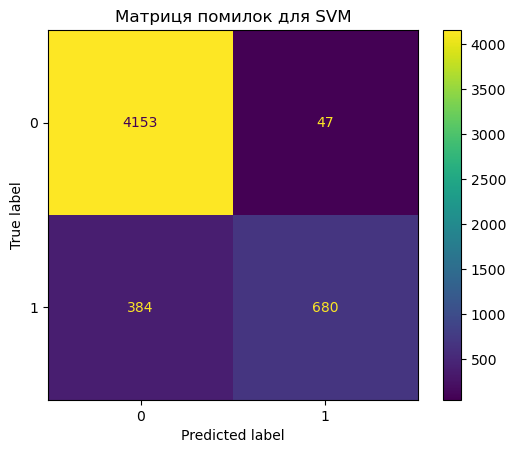

In [24]:
# Матриця помилок для тестової вибірки SVM
cm_svm = confusion_matrix(y_test, y_pred_test_svm)
cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=['0', '1'])
cmd_svm.plot()
plt.title("Матриця помилок для SVM")
plt.show()



In [25]:
#Найкращий класифікатор для подальшої роботи: SVM з точністю на тестовій вибірці 0.917
#Найкращий класифікатор для подальшої роботи: SVM з точністю  на навчальній вибірці 0.918

In [26]:
#Найкращий класифікатор: Серед розглянутих моделей метод опорних векторів (SVM) досяг найвищої точності на тестовій вибірці, становлячи 0.918. 
#Це робить його безсумнівно найкращим класифікатором.

#Найгірший результат: Логістична регресія показала найнижчу точність, яка склала 0.876 на тестовій вибірці.
#Хоча цей показник залишається досить високим, він все ж поступається двом іншим моделям.

#KNN: Метод K-найближчих сусідів досягнув точності 0.901 на тестовій вибірці. Це хороший результат, але він все ще дещо нижчий, ніж у SVM.

#Висновок: Усі три класифікатори продемонстрували високу точність і можуть бути ефективно використані для вирішення даного завдання.

In [ ]:
# навчання SVM
svm = SVC()  
svm.fit(X_train, y_train) 

# Прогнозування
y_pred_train_svm = svm.predict(X_train)  
y_pred_test_svm = svm.predict(X_test)    

In [ ]:
#5 Необхідно прийняти рішення щодо видачі кредиту для нових позичальників, інформація про яких знаходиться в файлі 'give_refuse_a_loan.csv': спрогнозуйте значення цільової змінної та зробіть висновки яким позичальникам варто видати кредит, а яким - відмовити.

In [ ]:
new_loan = pd.read_csv('give_refuse_a_loan.csv')
new_loan

In [ ]:
new_loan.info ()

In [ ]:
# Видалення стовпця loan_status
new_loan = new_loan.drop(columns=['loan_status'])

In [ ]:
# Заповнення пропусків у стовпці loan_int_rate 
mean_int_rate = new_loan['loan_int_rate'].mean()
new_loan['loan_int_rate'] = new_loan['loan_int_rate'].fillna(mean_int_rate)

# Перевірка результату
new_loan.info ()

In [ ]:
# Створюємо OneHotEncoder та StandardScaler
encoder = OneHotEncoder(sparse_output=False, drop='first')
scaler = StandardScaler()


# Перекодування категоріальних змінних
encoded_columns = encoder.fit_transform(new_loan[categorical_columns])
encoded_new_loan = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns), index=new_loan.index)

# Видаляємо оригінальні категоріальні стовпці
new_loan = new_loan.drop(columns=categorical_columns)
new_loan = pd.concat([new_loan, encoded_new_loan], axis=1)

In [ ]:
#Результат
new_loan.info ()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

X_std = scaler.fit_transform(X)  
X_new = scaler.transform(new_loan)  


In [ ]:
# Прогноз 
y_pred_new = svm.predict(X_new)

# Додаємо спрогнозовані значення цільової змінної до датафрейму new_companies
new_loan['loan_Predicted'] = y_pred_new

# Переглядаємо результати
print(new_loan.head(20))

In [ ]:
#На основі аналізу, серед усіх заявок було виявлено лише чотири потенційно ризикових клієнти, яким краще відмовити у видачі кредитів.